In [21]:
#read file
import pandas as pd
import re
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [3]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [6]:
df1=pd.read_csv('reviews.csv')
df1

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695.0,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145.0,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839.0,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750.0,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416.0,V Jillian,Holly's place was great. It was exactly what I...
...,...,...,...,...,...,...
271313,34255371,472972899,2019-06-20,252884950.0,Halis,He is good guy and he always ready to help you
271314,34255371,491765079,2019-07-20,163081915.0,Hadi,Great place! Great host!
271315,34255371,594990989519517683,2022-03-31,417231310.0,Freddy,"Great house, very clean. Wayne is very respons..."
271316,34255371,618901568486001458,2022-05-03,437948579.0,Rodrigo,If you are looking a cheap place to stay no mo...


In [7]:
df1['date']=pd.to_datetime(df1['date'])
df1['year'],df1['month']=df1['date'].dt.year,df1['date'].dt.month
df1

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
0,958,5977,2009-07-23,15695.0,Edmund C,"Our experience was, without a doubt, a five st...",2009.0,7.0
1,958,6660,2009-08-03,26145.0,Simon,Returning to San Francisco is a rejuvenating t...,2009.0,8.0
2,958,11519,2009-09-27,25839.0,Denis,We were very pleased with the accommodations a...,2009.0,9.0
3,958,16282,2009-11-05,33750.0,Anna,We highly recommend this accomodation and agre...,2009.0,11.0
4,958,26008,2010-02-13,15416.0,V Jillian,Holly's place was great. It was exactly what I...,2010.0,2.0
...,...,...,...,...,...,...,...,...
271313,34255371,472972899,2019-06-20,252884950.0,Halis,He is good guy and he always ready to help you,2019.0,6.0
271314,34255371,491765079,2019-07-20,163081915.0,Hadi,Great place! Great host!,2019.0,7.0
271315,34255371,594990989519517683,2022-03-31,417231310.0,Freddy,"Great house, very clean. Wayne is very respons...",2022.0,3.0
271316,34255371,618901568486001458,2022-05-03,437948579.0,Rodrigo,If you are looking a cheap place to stay no mo...,2022.0,5.0


In [8]:
df1['year'].value_counts()

2019.0    51392
2018.0    43314
2022.0    37435
2017.0    33664
2021.0    25484
2016.0    24615
2020.0    17573
2015.0    15399
2014.0     9984
2013.0     4697
2023.0     4280
2012.0     2149
2011.0     1008
2010.0      289
2009.0       34
Name: year, dtype: int64

In [9]:
df=df1[df1['date'].dt.year==2022]
df

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
290,218567,718891049608391462,2022-09-18,166221222.0,Josh,I really enjoyed my stay at Marins place in Ja...,2022.0,9.0
291,218567,792111113498988824,2022-12-28,70186342.0,Gerard,Had a great stay at Marin’s place. The locatio...,2022.0,12.0
407,646275,626868790380393842,2022-05-14,421324372.0,Jane,"A wonderful, eclectic and simple place to stay...",2022.0,5.0
420,646275,634075426770655543,2022-05-24,83166058.0,Fred,"Lynnore’s place is at a perfect location, very...",2022.0,5.0
421,646275,638414034697560330,2022-05-30,22117636.0,Liz,Great place! We would definitely stay here ag...,2022.0,5.0
...,...,...,...,...,...,...,...,...
271300,34247471,755144525496684577,2022-11-07,95791233.0,Dan,Dan’s place is super clean and comfortable. Co...,2022.0,11.0
271301,34247471,759550845944779440,2022-11-13,433717051.0,Andrew,Fantastic place to stay. Place was exactly as ...,2022.0,11.0
271302,34247471,786344434994393451,2022-12-20,465117573.0,Lan,good,2022.0,12.0
271315,34255371,594990989519517683,2022-03-31,417231310.0,Freddy,"Great house, very clean. Wayne is very respons...",2022.0,3.0


In [10]:
#explore dataset
df.shape

(37435, 8)

<Axes: xlabel='month', ylabel='count'>

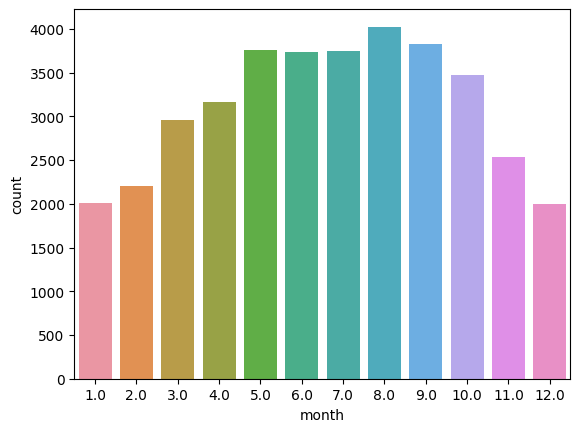

In [22]:
sns.countplot(x='month', data=df)

In [11]:
df['listing_id'].value_counts()

23313200    563
4464347     301
19029310    217
13845578    151
14804950    140
           ... 
15605090      1
15613006      1
15702583      1
15705696      1
30801321      1
Name: listing_id, Length: 2103, dtype: int64

In [12]:
df['date'].value_counts().sort_values()

2022-01-25     30
2022-12-01     33
2022-02-03     35
2022-01-19     36
2022-12-02     36
             ... 
2022-09-05    205
2022-05-01    210
2022-09-26    214
2022-09-23    225
2022-08-08    292
Name: date, Length: 365, dtype: int64

In [13]:
df.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         5
year             0
month            0
dtype: int64

In [14]:
df.dropna(inplace=True)

<ipython-input-14-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [15]:
df.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
year             0
month            0
dtype: int64

In [16]:
df.dtypes

listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id             float64
reviewer_name            object
comments                 object
year                    float64
month                   float64
dtype: object

In [17]:
df['comments']=df['comments'].astype(pd.StringDtype())
df.dtypes

<ipython-input-17-be77e3df0118>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments']=df['comments'].astype(pd.StringDtype())


listing_id                int64
id                        int64
date             datetime64[ns]
reviewer_id             float64
reviewer_name            object
comments                 string
year                    float64
month                   float64
dtype: object

In [18]:
wpt=nltk.WordPunctTokenizer()
stop_words=nltk.corpus.stopwords.words("english")

In [19]:
#preprocess text
def preprocess_text(text):
  text=re.sub(r'http\S+',' ',str(text))
  text=re.sub(r'<.*?>',' ',str(text))
  #remove numbers and special characters
  text=re.sub('[^A-Za-z]+',' ',str(text))
  text=text.lower()
  return text

In [20]:
df['comments']=df['comments'].apply(preprocess_text)
df.head(10)

<ipython-input-20-d724a843a1b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments']=df['comments'].apply(preprocess_text)


,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
290,218567,718891049608391462,2022-09-18,166221222.0,Josh,i really enjoyed my stay at marins place in ja...,2022.0,9.0
291,218567,792111113498988824,2022-12-28,70186342.0,Gerard,had a great stay at marin s place the location...,2022.0,12.0
407,646275,626868790380393842,2022-05-14,421324372.0,Jane,a wonderful eclectic and simple place to stay ...,2022.0,5.0
420,646275,634075426770655543,2022-05-24,83166058.0,Fred,lynnore s place is at a perfect location very ...,2022.0,5.0
421,646275,638414034697560330,2022-05-30,22117636.0,Liz,great place we would definitely stay here agai...,2022.0,5.0
422,646275,642043716686863654,2022-06-04,134017902.0,Sue,great location and access to bus and trains wi...,2022.0,6.0
423,646275,646459968397549139,2022-06-10,23296575.0,Sarah,lynnore s place was a wonderful base for explo...,2022.0,6.0
424,646275,652946518127379571,2022-06-19,439977821.0,Adrienne,wonderful place great communication from lynnore,2022.0,6.0
425,646275,658815137207986581,2022-06-27,816903.0,Amy,what a wonderful convenient charming spot to s...,2022.0,6.0
426,646275,660933140825503112,2022-06-30,13489267.0,Sydnye,great location beautiful garden lynnore was a ...,2022.0,6.0


In [24]:
df['comments']=df['comments'].apply(lambda x:' '.join([word for word in x.split()if word not in (stop_words)]))
df.head(10)

<ipython-input-24-da01538f134a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments']=df['comments'].apply(lambda x:' '.join([word for word in x.split()if word not in (stop_words)]))


,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
290,218567,718891049608391462,2022-09-18,166221222.0,Josh,really enjoyed stay marins place japantown per...,2022.0,9.0
291,218567,792111113498988824,2022-12-28,70186342.0,Gerard,great stay marin place location great many res...,2022.0,12.0
407,646275,626868790380393842,2022-05-14,421324372.0,Jane,wonderful eclectic simple place stay sf feel l...,2022.0,5.0
420,646275,634075426770655543,2022-05-24,83166058.0,Fred,lynnore place perfect location easy get around...,2022.0,5.0
421,646275,638414034697560330,2022-05-30,22117636.0,Liz,great place would definitely stay lynnore grea...,2022.0,5.0
422,646275,642043716686863654,2022-06-04,134017902.0,Sue,great location access bus trains short walk lo...,2022.0,6.0
423,646275,646459968397549139,2022-06-10,23296575.0,Sarah,lynnore place wonderful base exploring san fra...,2022.0,6.0
424,646275,652946518127379571,2022-06-19,439977821.0,Adrienne,wonderful place great communication lynnore,2022.0,6.0
425,646275,658815137207986581,2022-06-27,816903.0,Amy,wonderful convenient charming spot stay much r...,2022.0,6.0
426,646275,660933140825503112,2022-06-30,13489267.0,Sydnye,great location beautiful garden lynnore fabulo...,2022.0,6.0


In [25]:
lemma=WordNetLemmatizer()
def text_preprocess(text):
  text=' '.join(lemma.lemmatize(word)for word in text.split(' '))
  return text

In [26]:
df['comments']=df['comments'].apply(text_preprocess)
df.head(10)

<ipython-input-26-938d5c13c806>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['comments']=df['comments'].apply(text_preprocess)


,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month
290,218567,718891049608391462,2022-09-18,166221222.0,Josh,really enjoyed stay marins place japantown per...,2022.0,9.0
291,218567,792111113498988824,2022-12-28,70186342.0,Gerard,great stay marin place location great many res...,2022.0,12.0
407,646275,626868790380393842,2022-05-14,421324372.0,Jane,wonderful eclectic simple place stay sf feel l...,2022.0,5.0
420,646275,634075426770655543,2022-05-24,83166058.0,Fred,lynnore place perfect location easy get around...,2022.0,5.0
421,646275,638414034697560330,2022-05-30,22117636.0,Liz,great place would definitely stay lynnore grea...,2022.0,5.0
422,646275,642043716686863654,2022-06-04,134017902.0,Sue,great location access bus train short walk lov...,2022.0,6.0
423,646275,646459968397549139,2022-06-10,23296575.0,Sarah,lynnore place wonderful base exploring san fra...,2022.0,6.0
424,646275,652946518127379571,2022-06-19,439977821.0,Adrienne,wonderful place great communication lynnore,2022.0,6.0
425,646275,658815137207986581,2022-06-27,816903.0,Amy,wonderful convenient charming spot stay much r...,2022.0,6.0
426,646275,660933140825503112,2022-06-30,13489267.0,Sydnye,great location beautiful garden lynnore fabulo...,2022.0,6.0


In [27]:
comment_words=''
stopwords=set(STOPWORDS)

In [28]:
for val in df.comments:
  val=str(val)
  tokens=val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i]
  comment_words+=" ".join(tokens)+" "

In [29]:
wordcloud=WordCloud(width=800,height=800,
                    background_color='pink',
                    min_font_size=10,max_words=100).generate(comment_words)

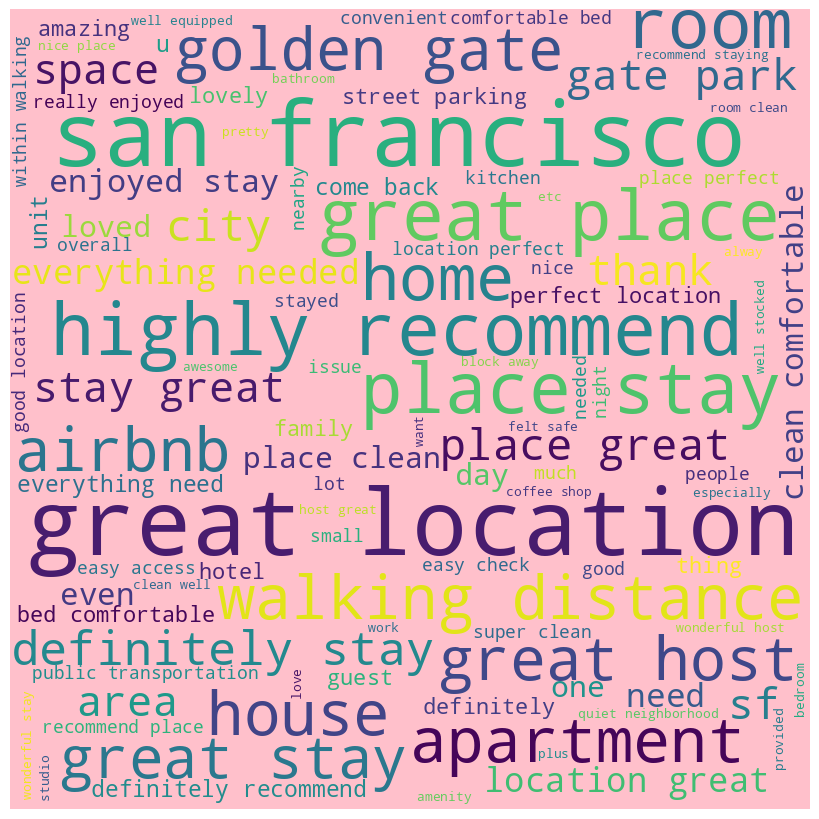

In [30]:
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [31]:
df2=df['comments']
df2.head()

290    really enjoyed stay marins place japantown per...
291    great stay marin place location great many res...
407    wonderful eclectic simple place stay sf feel l...
420    lynnore place perfect location easy get around...
421    great place would definitely stay lynnore grea...
Name: comments, dtype: object

In [32]:
tv=TfidfVectorizer(min_df=0.2,max_df=0.8,norm='l2',
                   use_idf=True,smooth_idf=True)
tv_matrix=tv.fit_transform(df2)
tv_matrix=tv_matrix.toarray()
vocab=tv.get_feature_names_out()
pd.DataFrame(np.round(tv_matrix,2),columns=vocab)

,clean,great,host,location,place,stay
0,0.00,0.55,0.00,0.00,0.60,0.58
1,0.00,0.60,0.00,0.34,0.65,0.32
2,0.00,0.00,0.00,0.00,0.46,0.89
3,0.44,0.34,0.00,0.39,0.74,0.00
4,0.00,0.70,0.47,0.00,0.38,0.37
...,...,...,...,...,...,...
37425,0.65,0.00,0.00,0.00,0.54,0.53
37426,0.00,0.31,0.00,0.00,0.68,0.66
37427,0.00,0.00,0.00,0.00,0.00,0.00
37428,0.79,0.61,0.00,0.00,0.00,0.00


In [33]:
!pip install textblob

In [34]:
from textblob import TextBlob

In [35]:
df3=df.drop(columns=['listing_id','id','date','reviewer_id','reviewer_name','year','month'])
df3=df3.reset_index(drop=True)
df3

,comments
0,really enjoyed stay marins place japantown per...
1,great stay marin place location great many res...
2,wonderful eclectic simple place stay sf feel l...
3,lynnore place perfect location easy get around...
4,great place would definitely stay lynnore grea...
...,...
37425,dan place super clean comfortable communicatio...
37426,fantastic place stay place exactly shown pic d...
37427,good
37428,great house clean wayne responsive gave supply...


In [36]:
df3[['polarity','subjectivity']]=df3['comments'].apply(lambda x:pd.Series(TextBlob(x).sentiment))
df3['target']=np.select([df3['polarity']>0,df3['polarity']<0],[1,0])
df3=df3.drop(['polarity','subjectivity'],axis=1)
df3

,comments,target
0,really enjoyed stay marins place japantown per...,1
1,great stay marin place location great many res...,1
2,wonderful eclectic simple place stay sf feel l...,1
3,lynnore place perfect location easy get around...,1
4,great place would definitely stay lynnore grea...,1
...,...,...
37425,dan place super clean comfortable communicatio...,1
37426,fantastic place stay place exactly shown pic d...,1
37427,good,1
37428,great house clean wayne responsive gave supply...,1


In [46]:
countV=df3['target'].value_counts()
countV

1    35458
0     1972
Name: target, dtype: int64

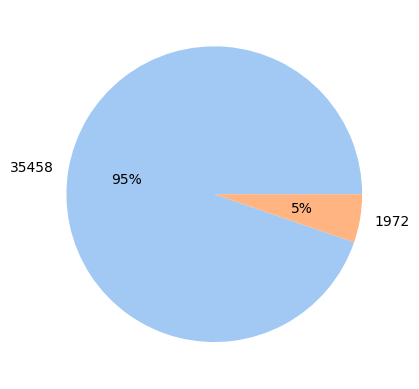

In [49]:
pie_color=sns.color_palette('pastel')
sentiment=['positive','negative']
plt.pie(countV,labels=countV,colors=pie_color,autopct='%.0f%%')
plt.show()

In [50]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 128.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 80.9 MB/s eta 0:00:00


In [51]:
import os
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.utils import Sequence, to_categorical
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, GlobalMaxPooling1D, Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Flatten, BatchNormalization, Input
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from transformers import AutoTokenizer,TFBertModel
from transformers import DistilBertTokenizer, TFDistilBertForSequenceClassification

In [52]:
distilTokenizer=DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilBert=TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=1)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [53]:
X_train=distilTokenizer(text=df3.comments.tolist(),
                  padding='longest',
                  max_length=512,
                  return_tensors='tf',
                  return_token_type_ids=False,
                  return_attention_mask=True,
                  verbose=True)
print(X_train['input_ids'].shape,X_train['attention_mask'].shape)

(37430, 767) (37430, 767)


In [54]:
input_ids=X_train['input_ids']

input_mask=X_train['attention_mask']

In [55]:
print(input_ids[0:3])

tf.Tensor(
[[  101  2428  5632 ...     0     0     0]
 [  101  2307  2994 ...     0     0     0]
 [  101  6919 20551 ...     0     0     0]], shape=(3, 767), dtype=int32)


In [56]:
print(input_mask[0:3])

tf.Tensor(
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]], shape=(3, 767), dtype=int32)


In [57]:
print(df3['comments'][0])
print(df3['comments'][1])
print(df3['comments'][2])


really enjoyed stay marins place japantown perfect live work good internet desk able set desktop computer dog friendly neighborhood lot great restaurant bar shopping right door
great stay marin place location great many restaurant nearby bus stop right outside door place well stocked found everything needed
wonderful eclectic simple place stay sf feel like living like local lynnore super available question well would stay


In [58]:
y_train=df3.target.values
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [59]:
distil_input_ids=Input(shape=(None,),dtype=tf.int32,name='input_ids')
distil_attention_mask=Input(shape=(None,),dtype=tf.int32, name='attention_mask')

inputs={'input_ids':distil_input_ids,'attention_mask':distil_attention_mask}

outputs=distilBert(inputs)
logits=outputs.logits

distil_model=tf.keras.Model(inputs=inputs,outputs=logits)

distil_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, None)]       0           []                               
                                                                                                  
 tf_distil_bert_for_sequence_cl  TFSequenceClassifie  66954241   ['attention_mask[0][0]',         
 assification (TFDistilBertForS  rOutput(loss=None,               'input_ids[0][0]']              
 equenceClassification)         logits=(None, 1),                                                 
                                 hidden_states=None                                           

In [63]:
from tensorflow.keras.optimizers.legacy import Adam

In [67]:
distil_model.compile(optimizer=Adam(learning_rate=3e-5),
                     loss=BinaryCrossentropy(from_logits=True),
                     metrics=BinaryAccuracy('accuracy'))

#train the model
distil_final=distil_model.fit(
    x={'input_ids':X_train['input_ids'],'attention_mask':X_train['attention_mask']},
    y=y_train,
    validation_split=0.7,
    epochs=10,
    batch_size=16,
    shuffle=True)

Epoch 1/10


InvalidArgumentError: ignored